In [2]:
from math import sqrt, pi
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy import exp

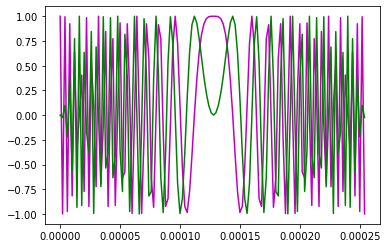

In [29]:
bw = 500e3
sf = 7
M = 2**sf
mu = (bw**2)/M
T = M/bw
fs = bw
t = np.arange(0, T, 1/fs, dtype=np.double)

shi = 2*np.pi*((mu*t/2) - (bw/2))*t
sig = exp(1j*shi)

# plt.subplot(1, 2, 1)
plt.plot(t,np.real(sig), 'm')

# plt.subplot(1, 2, 2)
plt.plot(t,np.imag(sig), 'g')